In [342]:
#Some imports
import numpy as np
import matplotlib.pyplot as plt
import random
import queue
import time
from IPython.display import clear_output

#Functions that will be very useful for creating/updating mazes

'''
Define the grid to be working with

**inputs:
dim = dimension size of the grid
n = number of mines

**returns:
board = the grid to be worked with
'''

def environment(dim, n):
    #start with a dim by dim zero array

    board = np.zeros((dim,dim))

    while n > 0:
        i = random.randint(0, dim - 1)
        j = random.randint(0, dim - 1)

        if board[i][j] == 9:
            pass
        else:
            board[i][j] = 9
            n -= 1

    for i in range(0, dim):
        for j in range(0, dim):
            if board[i][j] == 9:
                continue

            #check all the neighbors
            mines = 0
            rightValid = False
            leftValid = False
            upValid = False
            downValid = False
            if j - 1 >= 0:
                leftValid = True
            if j + 1 < len(board):
                rightValid = True
            if i + 1 < len(board):
                downValid = True
            if i - 1 >= 0:
                upValid = True

            #check left
            if leftValid == True:
                #check left adjacent
                if board[i][j-1] == 9:
                    #mine is here
                    mines += 1
                else:
                    #no mine is here
                    pass
                #check left & up
                if upValid == True:
                    if board[i-1][j-1] == 9:
                        #mine is here
                        mines += 1
                    else:
                        #no mine is here
                        pass
                #check left & down
                if downValid == True:
                    if board[i+1][j-1] == 9:
                        #mine is here
                        mines += 1
                    else:
                        #no mine is here
                        pass

            #check right
            if rightValid == True:
                #check right adjacent
                if board[i][j+1] == 9:
                    #mine is here
                    mines += 1
                else:
                    #no mine is here
                    pass
                #check right & up
                if upValid == True:
                    if board[i-1][j+1] == 9:
                        #mine is here
                        mines += 1
                    else:
                        #no mine is here
                        pass
                #check right & down
                if downValid == True:
                    if board[i+1][j+1] == 9:
                        #mine is here
                        mines += 1
                    else:
                        #no mine is here
                        pass

            #check up adjacent
            if upValid == True:
                if board[i-1][j] == 9:
                    #mine is here
                    mines += 1
                else:
                    #no mine is here
                    pass

            #check down adjacent
            if downValid == True:
                if board[i+1][j] == 9:
                    #mine is here
                    mines += 1
                else:
                    #no mine is here
                    pass

            board[i][j] = mines

    return board

'''
A Method to Check the Neighbors of a Cell

**inputs:
possible_moves = array of coordinates for the remaining moves
coord = tuple containing the coordinates

**returns:
neighbors = the list of neighbors for the given coordinate
'''

def checkNeighbors(possible_moves, coord):
    neighbors = []
    i = coord[0]
    j = coord[1]

    if (i+1, j) in possible_moves:
        neighbors.append((i+1, j))

    if (i-1, j) in possible_moves:
        neighbors.append((i-1, j))

    if (i, j+1) in possible_moves:
        neighbors.append((i, j+1))

    if (i, j-1) in possible_moves:
        neighbors.append((i, j-1))

    if (i+1, j+1) in possible_moves:
        neighbors.append((i+1, j+1))

    if (i-1, j-1) in possible_moves:
        neighbors.append((i-1, j-1))

    if (i+1, j-1) in possible_moves:
        neighbors.append((i+1, j-1))

    if (i-1, j+1) in possible_moves:
        neighbors.append((i-1, j+1))

    return neighbors

'''
A Method to Update the Agent Board

**inputs:
coord = tuple containing the coordinates
main_board = the main board
agent_board = the agent board

**returns:
agent_board = the grid to be worked with
coord = tuple containing the coordinates
clue = number of adjacent mines
'''

def updateBoard(coord, main_board, agent_board):
    i = coord[0]
    j = coord[1]
    agent_board[i][j] = main_board[i][j]
    clue = agent_board[i][j]
    return agent_board, coord, clue

'''
A Method to Check the Number of Uncovered Mines for a Cell

**inputs:
board = the agent board
coord = tuple containing the coordinates

**returns:
mines = the number of neighboring mines
'''

def checkMines(board, coord):
    #check all the neighbors
    mines = 0
    i = coord[0]
    j = coord[1]
    rightValid = False
    leftValid = False
    upValid = False
    downValid = False
    if j - 1 >= 0:
        leftValid = True
    if j + 1 < len(board):
         rightValid = True
    if i + 1 < len(board):
         downValid = True
    if i - 1 >= 0:
        upValid = True

    #check left
    if leftValid == True:
        #check left adjacent
        if int(board[i][j-1]) == 9 or board[i][j-1] == 0.5:
            #mine is here
            mines += 1
        else:
            #no mine is here
            pass
        #check left & up
        if upValid == True:
            if int(board[i-1][j-1]) == 9 or board[i-1][j-1] == 0.5:
                #mine is here
                mines += 1
            else:
                #no mine is here
                pass
        #check left & down
        if downValid == True:
            if int(board[i+1][j-1]) == 9 or board[i+1][j-1] == 0.5:
                #mine is here
                mines += 1
            else:
                #no mine is here
                pass

    #check right
    if rightValid == True:
        #check right adjacent
        if int(board[i][j+1]) == 9 or board[i][j+1] == 0.5:
            #mine is here
            mines += 1
        else:
            #no mine is here
            pass
        #check right & up
        if upValid == True:
            if int(board[i-1][j+1]) == 9 or board[i-1][j+1] == 0.5:
                 #mine is here
                mines += 1
            else:
                #no mine is here
                pass
        #check right & down
        if downValid == True:
            if int(board[i+1][j+1]) == 9 or board[i+1][j+1] == 0.5:
                #mine is here
                mines += 1
            else:
                #no mine is here
                pass

    #check up adjacent
    if upValid == True:
        if int(board[i-1][j]) == 9 or board[i-1][j] == 0.5:
            #mine is here
            mines += 1
        else:
            #no mine is here
            pass

    #check down adjacent
    if downValid == True:
        if int(board[i+1][j]) == 9 or board[i+1][j] == 0.5:
            #mine is here
            mines += 1
        else:
            #no mine is here
            pass

    return mines

'''
Initialize blank equation to be used for inference

**inputs:
dim = the dimension size

**returns:
equation = a list of dim**2 zeros
'''

def equation(dim):
    equation = []
    while len(equation) < dim*dim:
        equation.append(0)
    return equation


In [343]:
'''
The Actual Game to be Played by our Agent

***********************INFERENCE****************************

**inputs:
dim = dimension size of the grid
n = number of mines

**returns:

'''

def AdvancedMinesweeper(dim, n):

    #create our main board and the board the agent will see
    main_board = environment(dim, n)
    agent_board = environment(dim, 0) + 11

    #our three fringes, which make up our general knowledge base
    mineFringe = []
    safeFringe = []
    KB = []

    #a list of the moves made in order to be used in pygame
    moveOrder = []

    #convert equation number to coordinate for inference
    dic1 = {}
    t = 0
    for i in range(dim):
        for j in range(dim):
            dic1[t] = (i,j)
            t += 1

    #convert coordinate to equation number for inference
    dic2 = {}
    t = 0
    for i in range(dim):
        for j in range(dim):
            dic2[(i,j)] = t
            t += 1

    #populate a list of all the possible moves we can make, which will keep track of moves that can be made
    possible_moves = []
    for i in range(0, dim):
        for j in range(0, dim):
            possible_moves.append((i, j))


    #play until we finish the game
    gameFinished = False
    while gameFinished == False:

        #our terminating condition
        if len(possible_moves)==0:
            gameFinished=True

            clear_output()


            #UNCOMMENT TO SHOW BOARD OUTPUTS
            '''
            print("Agent's Board:")
            print(agent_board)
            print("The Actual Board:")
            print(main_board)
            '''

            #check our final score (# of correctly identified mines/# of total mines)
            total, correct = 0, 0
            for i in range(0, dim):
                for j in range(0, dim):
                    if main_board[i][j] == 9:
                        total += 1
                    if agent_board[i][j] == 0.5:
                        correct += 1
                        
            score = correct/total
            #print(score)
            return score

        else:

            '''
            #CHECK THE MINE FRINGE
            '''

            #if nothing in the mine fringe pass to next step
            if len(mineFringe) == 0:
                pass

            #immediately flag things in mine fringe
            else:

                #go through the mineFringe and flag spots until the fringe is empty again
                while len(mineFringe) != 0:

                    #if the move has already been made, remove from minefringe
                    if not(mineFringe[0] in possible_moves):
                        mineFringe.remove(mineFringe[0])
                        continue

                    #flag a spot with 0.5
                    agent_board[mineFringe[0][0]][mineFringe[0][1]] = 0.5

                    #remove from possible moves and mine fringe
                    possible_moves.remove(mineFringe[0])
                    moveOrder.append((mineFringe[0], 0.5))
                    mineFringe.remove(mineFringe[0])

                #restarts main while loop from beginning
                continue

            '''
            #CHECK THE SAFE FRINGE
            '''

            #if nothing in the safe fringe pass to next step
            if len(safeFringe) == 0:
                pass

            #immediately open things in safe fringe
            else:

                #go through the safeFringe and open spots until the fringe is empty again
                while len(safeFringe) != 0:

                    #if the move has already been made
                    if not(safeFringe[0] in possible_moves):
                        safeFringe.remove(safeFringe[0])
                        continue

                    i = safeFringe[0][0]
                    j = safeFringe[0][1]

                    #open a spot if it is in the safe fringe
                    agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)

                    #add move to KB, then remove from possible moves and mine fringe
                    KB.append([coord, clue, len(checkNeighbors(possible_moves, coord)), clue])
                    possible_moves.remove(safeFringe[0])
                    moveOrder.append((safeFringe[0], clue))
                    safeFringe.remove(safeFringe[0])

                #restarts main while loop from beginning
                continue

            '''
            #CHECK THE KNOWLEDGE BASE
            '''
            #the knowledge base if of the form [(i,j), tempClue, numNeighbors, clue]

            #if nothing in the KB pass to next step
            if len(KB) == 0:
                pass

            #look through our KB for moves to add to safe fringe or mine fringe
            else:
                #make a list for things to be removed from KB
                to_be_removed = []
                for item in range(0, len(KB)):

                    #updates the value of adjacent neighbors in the KB
                    KB[item][2] = len(checkNeighbors(possible_moves, KB[item][0]))

                    #Update the temporary clue
                    if KB[item][1] + checkMines(agent_board, KB[item][0]) == KB[item][3]:
                        pass
                    else:
                        KB[item][1] = KB[item][3] - checkMines(agent_board, KB[item][0])


                check = False
                #check each item in the KB
                for item in KB:
                    #if clue is 0 all neighbors are safe
                    if item[1] == 0:
                        x = item
                        safeFringe += checkNeighbors(possible_moves, x[0])
                        check = True
                        break


                    #if number of neighbors is equal to tempClue, all are mines
                    elif item[1] == item[2]:
                        x = item
                        mineFringe += checkNeighbors(possible_moves, x[0])
                        check = True
                        break

                    #if neither of the two above things, don't do anything
                    else:
                        pass


                #only remove from KB if we added something to mine or safe fringe
                if check == True:
                    KB.remove(x)
                    continue

            '''
            #INFERENCE
            '''

            #take from knowledge base and add to an equation
            inference = []
            equals = []
            for item in KB:
                eq = equation(dim)
                x = checkNeighbors(possible_moves, item[0])
                for thing in x:
                    eq[dic2[thing]] = 1

                #append each equation to a general matrix
                inference.append(eq)
                #append the clue to a general matrix
                equals.append([item[1]])

            #the matrix solver
            if len(inference) == 0:
                pass
            else:
                #a list to make things easier in a later step
                index=list(range(len(inference)))
                #check through column
                for i in range(len(inference[0])):
                    #check through row
                    for row in range(len(inference)):
                        #this is for checking zero rows and columns
                        #looking for the first nonzero item in the row that has no nonzero to its left
                        if inference[row][i]!=0 and 1 not in inference[row][0:i]:

                            #scale the whole row by the leading nonzero item selected
                            scalar=1/inference[row][i]
                            for column in range(0,len(inference[0])):
                                inference[row][column]*=scalar
                            equals[row][0]*=scalar

                            #now do operations on every row but the one selected
                            for k in index[0:row]+index[row+1:]:

                                scalar2=inference[k][i]
                                for j in range(len(inference[0])):
                                    inference[k][j]=inference[k][j]-scalar2*inference[row][j]
                                equals[k][0]=equals[k][0]-scalar2*equals[row][0]

                gobackup=False

                #now perform a check on our matricies
                for i in range(len(inference)):

                    #counters to be used to check if an inference can be made
                    counter=0
                    negCounter=0

                    #check how many ones are in a row
                    for j in range(len(inference[i])):
                        if inference[i][j]==1:
                            counter+=1

                        #check for negative variables in the equation
                        elif inference[i][j] < 0:
                            negCounter+=1

                    #check if we have a definite safe move
                    if equals[i][0]==0 and counter > 0 and negCounter==0:
                        gobackup=True
                        for j in range(len(inference[i])):
                            if inference[i][j]==1:
                                safeFringe.append(dic1[j])

                    #check if we have a definite mine to flag
                    if counter == equals[i][0] and counter > 0 and negCounter==0:
                        gobackup=True
                        for j in range(len(inference[i])):
                            if inference[i][j]==1:
                                mineFringe.append(dic1[j])
                    
                    #A - B = 1
                    if counter == equals[i][0] and negCounter > 0:
                        gobackup=True
                        for j in range(len(inference[i])):
                            if inference[i][j]==1:
                                mineFringe.append(dic1[j])
                            elif inference[i][j]==-1:
                                safeFringe.append(dic1[j])

                    #A - B = -1
                    if -1*negCounter == equals[i][0] and counter > 0:
                        gobackup=True
                        for j in range(len(inference[i])):
                            if inference[i][j]==1:
                                safeFringe.append(dic1[j])
                            elif inference[i][j]==-1:
                                mineFringe.append(dic1[j])

                #if we made an inference, go back up
                if gobackup==True:
                    continue


            '''
            #RANDOMPICK (LAST RESORT)
            '''

            #pick a random coordinate from the remaining possible moves
            x = random.randint(0,len(possible_moves) - 1)
            i = possible_moves[x][0]
            j = possible_moves[x][1]

            #open the random spot
            agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)

            #if the spot we hit was a mine tell the user and keep going, no need to add to KB
            if clue == 9:
                pass

            #otherwise add to KB
            else:
                KB.append([coord, clue, len(checkNeighbors(possible_moves, coord)), clue])

            #remove from possible moves
            possible_moves.remove(coord)
            moveOrder.append((coord, clue))

AdvancedMinesweeper(15, 20)

0.95

In [557]:
import numpy as np

def reduce(matrix):
    a = np.array(matrix)

    #list of indecies
    b = []
    for i in range(0, len(a[0])):
        if sum(list(map(abs,a[:,i])))==0:
            pass
        else:
            b.append(i)

    #the reduced matrix
    c = []

    for i in range(0, len(a)):
        c.append(list(a[i][b]))

    #print('original\n', a)
    #print('new\n', np.matrix(c))
    #print('non-zero columns\n', b)
    
    return a,b,c 

'''
Generate Possible Solutions for a Given Matrix

**inputs:
zero_columns = a list of columns that should be removed/not included
num_vars = number of variables in a given equation

**returns:
solutions = a list of solutions to be checked
'''

def generateSolutions(matrix):
    solutions = []
    
    #print("size:",2**len(matrix[0]))
    
    if len(matrix[0]) <= 17:
        #print('using normal!')
        for i in range(0,2**len(matrix[0])):
            a = list(bin(i)[2:])
            a = list(map(int, a))
            while len(a) < len(matrix[0]):
                a.insert(0, 0)
            solutions.append(a)
    else:
        #print('using approx!')
        moves = np.linspace(0,2**len(matrix[0]) - 1,2**len(matrix[0]))
        np.random.shuffle(moves)
        i = 0
        while i < 2**18:
            a = list(bin(int(moves[i]))[2:])
            a = list(map(int, a))
            while len(a) < len(matrix[0]):
                a.insert(0, 0)
            solutions.append(a)
            i += 1
            
    #print(np.matrix(solutions))
    return solutions


def getProbs(solutions, matrix, matrix_solutions):
    matrix=np.array(matrix)
    solution_list = []
    
    for item in solutions:
        result = matrix.dot(item)
        if np.array_equal(result, matrix_solutions):
            solution_list.append(item)
            
    solution_list = np.array(solution_list)

    #print('for the matrix:\n', matrix, '=', matrix_solutions)
    #print('the solutions are:\n', solution_list)
        
    prob_list = []
    
    if len(solution_list) == 0:
        pass
    else:
        for i in range(0, len(solution_list[0])):
            prob_list.append(sum(solution_list[:,i])/len(solution_list[:,i]))
        
    return prob_list
    

matrix=np.array([[0, 1, -1, 0, 0, 0],[0, 0, 1, 0, 1, 1]])
a,b,c=reduce(matrix)
prob=getProbs(generateSolutions(c),c,[1,2])

#MINIMIZING COST 
probmin=1
for i in range(0,len(prob)): 
    if prob[i]<probmin:
        pointer=i
        probmin=prob[i]
#print(probmin,pointer,b[pointer])

In [564]:
'''
The Actual Game to be Played by our Agent

***********************INFERENCE****************************

**inputs:
dim = dimension size of the grid
n = number of mines

**returns:

'''

def AdvancedMinesweeperCost(dim, n):

    #create our main board and the board the agent will see
    main_board = environment(dim, n)
    agent_board = environment(dim, 0) + 11

    #our three fringes, which make up our general knowledge base
    mineFringe = []
    safeFringe = []
    KB = []

    #a list of the moves made in order to be used in pygame
    moveOrder = []

    #convert equation number to coordinate for inference
    dic1 = {}
    t = 0
    for i in range(dim):
        for j in range(dim):
            dic1[t] = (i,j)
            t += 1

    #convert coordinate to equation number for inference
    dic2 = {}
    t = 0
    for i in range(dim):
        for j in range(dim):
            dic2[(i,j)] = t
            t += 1

    #populate a list of all the possible moves we can make, which will keep track of moves that can be made
    possible_moves = []
    for i in range(0, dim):
        for j in range(0, dim):
            possible_moves.append((i, j))


    #play until we finish the game
    gameFinished = False
    while gameFinished == False:

        #our terminating condition
        if len(possible_moves)==0:
            gameFinished=True

            clear_output()


            #UNCOMMENT TO SHOW BOARD OUTPUTS
            '''
            print("Agent's Board:")
            print(agent_board)
            print("The Actual Board:")
            print(main_board)
            '''

            #check our final score (# of correctly identified mines/# of total mines)
            total, correct = 0, 0
            for i in range(0, dim):
                for j in range(0, dim):
                    if main_board[i][j] == 9:
                        total += 1
                    if agent_board[i][j] == 0.5:
                        correct += 1
                        
            score = correct/total
            #print(score)
            return score

        else:

            '''
            #CHECK THE MINE FRINGE
            '''

            #if nothing in the mine fringe pass to next step
            if len(mineFringe) == 0:
                pass

            #immediately flag things in mine fringe
            else:

                #go through the mineFringe and flag spots until the fringe is empty again
                while len(mineFringe) != 0:

                    #if the move has already been made, remove from minefringe
                    if not(mineFringe[0] in possible_moves):
                        mineFringe.remove(mineFringe[0])
                        continue

                    #flag a spot with 0.5
                    agent_board[mineFringe[0][0]][mineFringe[0][1]] = 0.5

                    #remove from possible moves and mine fringe
                    possible_moves.remove(mineFringe[0])
                    moveOrder.append((mineFringe[0], 0.5))
                    mineFringe.remove(mineFringe[0])

                #restarts main while loop from beginning
                continue

            '''
            #CHECK THE SAFE FRINGE
            '''

            #if nothing in the safe fringe pass to next step
            if len(safeFringe) == 0:
                pass

            #immediately open things in safe fringe
            else:

                #go through the safeFringe and open spots until the fringe is empty again
                while len(safeFringe) != 0:

                    #if the move has already been made
                    if not(safeFringe[0] in possible_moves):
                        safeFringe.remove(safeFringe[0])
                        continue

                    i = safeFringe[0][0]
                    j = safeFringe[0][1]

                    #open a spot if it is in the safe fringe
                    agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)

                    #add move to KB, then remove from possible moves and mine fringe
                    KB.append([coord, clue, len(checkNeighbors(possible_moves, coord)), clue])
                    possible_moves.remove(safeFringe[0])
                    moveOrder.append((safeFringe[0], clue))
                    safeFringe.remove(safeFringe[0])

                #restarts main while loop from beginning
                continue

            '''
            #CHECK THE KNOWLEDGE BASE
            '''
            #the knowledge base if of the form [(i,j), tempClue, numNeighbors, clue]

            #if nothing in the KB pass to next step
            if len(KB) == 0:
                pass

            #look through our KB for moves to add to safe fringe or mine fringe
            else:
                #make a list for things to be removed from KB
                to_be_removed = []
                for item in range(0, len(KB)):

                    #updates the value of adjacent neighbors in the KB
                    KB[item][2] = len(checkNeighbors(possible_moves, KB[item][0]))

                    #Update the temporary clue
                    if KB[item][1] + checkMines(agent_board, KB[item][0]) == KB[item][3]:
                        pass
                    else:
                        KB[item][1] = KB[item][3] - checkMines(agent_board, KB[item][0])


                check = False
                #check each item in the KB
                for item in KB:
                    #if clue is 0 all neighbors are safe
                    if item[1] == 0:
                        x = item
                        safeFringe += checkNeighbors(possible_moves, x[0])
                        check = True
                        break


                    #if number of neighbors is equal to tempClue, all are mines
                    elif item[1] == item[2]:
                        x = item
                        mineFringe += checkNeighbors(possible_moves, x[0])
                        check = True
                        break

                    #if neither of the two above things, don't do anything
                    else:
                        pass


                #only remove from KB if we added something to mine or safe fringe
                if check == True:
                    KB.remove(x)
                    continue

            '''
            #INFERENCE
            '''

            #take from knowledge base and add to an equation
            inference = []
            equals = []
            for item in KB:
                eq = equation(dim)
                x = checkNeighbors(possible_moves, item[0])
                for thing in x:
                    eq[dic2[thing]] = 1

                #append each equation to a general matrix
                inference.append(eq)
                #append the clue to a general matrix
                equals.append([item[1]])

            #the matrix solver
            if len(inference) == 0:
                pass
            else:
                #a list to make things easier in a later step
                index=list(range(len(inference)))
                #check through column
                for i in range(len(inference[0])):
                    #check through row
                    for row in range(len(inference)):
                        #this is for checking zero rows and columns
                        #looking for the first nonzero item in the row that has no nonzero to its left
                        if inference[row][i]!=0 and 1 not in inference[row][0:i]:

                            #scale the whole row by the leading nonzero item selected
                            scalar=1/inference[row][i]
                            for column in range(0,len(inference[0])):
                                inference[row][column]*=scalar
                            equals[row][0]*=scalar

                            #now do operations on every row but the one selected
                            for k in index[0:row]+index[row+1:]:

                                scalar2=inference[k][i]
                                for j in range(len(inference[0])):
                                    inference[k][j]=inference[k][j]-scalar2*inference[row][j]
                                equals[k][0]=equals[k][0]-scalar2*equals[row][0]

                gobackup=False

                #now perform a check on our matricies
                for i in range(len(inference)):

                    #counters to be used to check if an inference can be made
                    counter=0
                    negCounter=0

                    #check how many ones are in a row
                    for j in range(len(inference[i])):
                        if inference[i][j]==1:
                            counter+=1

                        #check for negative variables in the equation
                        elif inference[i][j] < 0:
                            negCounter+=1

                    #check if we have a definite safe move
                    if equals[i][0]==0 and counter > 0 and negCounter==0:
                        gobackup=True
                        for j in range(len(inference[i])):
                            if inference[i][j]==1:
                                safeFringe.append(dic1[j])

                    #check if we have a definite mine to flag
                    if counter == equals[i][0] and counter > 0 and negCounter==0:
                        gobackup=True
                        for j in range(len(inference[i])):
                            if inference[i][j]==1:
                                mineFringe.append(dic1[j])
                    
                    #A - B = 1
                    if counter == equals[i][0] and negCounter > 0:
                        gobackup=True
                        for j in range(len(inference[i])):
                            if inference[i][j]==1:
                                mineFringe.append(dic1[j])
                            elif inference[i][j]==-1:
                                safeFringe.append(dic1[j])

                    #A - B = -1
                    if -1*negCounter == equals[i][0] and counter > 0:
                        gobackup=True
                        for j in range(len(inference[i])):
                            if inference[i][j]==1:
                                safeFringe.append(dic1[j])
                            elif inference[i][j]==-1:
                                mineFringe.append(dic1[j])

                #if we made an inference, go back up
                if gobackup==True:
                    continue

                    
            '''
            #PROBABILITY/MINIMIZE COST 
            '''   
            if len(inference)==0:
                pass
            else: 
                matrix = np.array(inference)
                equals = np.array(equals)
                equals = equals[:,0]
                
                a,b,c=reduce(matrix)
                prob = getProbs(generateSolutions(c), c, equals)
                
                #print('prob=', prob)
                
                #MINIMIZING COST 
                
                if len(prob) == 0:
                    pass
                else:
                    probmin=1
                    for i in range(0,len(prob)): 
                        if prob[i]<probmin:
                            pointer=i
                            probmin=prob[i]
            
                    if probmin<0.5:
                
                        probCoord=dic1[b[pointer]]
            
                        agent_board, coord, clue = updateBoard((probCoord[0],probCoord[1]), main_board, agent_board)

                        if clue == 9:
                            pass

                        #otherwise add to KB
                        else:
                            KB.append([coord, clue, len(checkNeighbors(possible_moves, coord)), clue])

                        #remove from possible moves
                        possible_moves.remove(coord)
                        moveOrder.append((coord, clue))
                        continue
                    
                    else: 
                            
                        #pick a random coordinate from the remaining possible moves
                        x = random.randint(0,len(possible_moves) - 1)
                        i = possible_moves[x][0]
                        j = possible_moves[x][1]

                        #open the random spot
                        agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)

                        #if the spot we hit was a mine tell the user and keep going, no need to add to KB
                        if clue == 9:
                            pass

                        #otherwise add to KB
                        else:
                            KB.append([coord, clue, len(checkNeighbors(possible_moves, coord)), clue])

                        #remove from possible moves
                        possible_moves.remove(coord)
                        moveOrder.append((coord, clue))
                        continue
            
                                        
            '''
            #RANDOMPICK (LAST RESORT)
            '''

            #pick a random coordinate from the remaining possible moves
            x = random.randint(0,len(possible_moves) - 1)
            i = possible_moves[x][0]
            j = possible_moves[x][1]

            #open the random spot
            agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)

            #if the spot we hit was a mine tell the user and keep going, no need to add to KB
            if clue == 9:
                pass

            #otherwise add to KB
            else:
                KB.append([coord, clue, len(checkNeighbors(possible_moves, coord)), clue])

            #remove from possible moves
            possible_moves.remove(coord)
            moveOrder.append((coord, clue))

AdvancedMinesweeperCost(10, 50)

0.78

In [479]:
nlist = np.linspace(1, 49, 49)

score1=[]
score2=[]
for item in nlist:
    temp1 = []
    temp2 = []
    while len(temp1) < 10:
        temp1.append(AdvancedMinesweeper(7,item))
        temp2.append(AdvancedMinesweeper2(7,item))
    print(item)
    time.sleep(0.5)
    score1.append(sum(temp1)/len(temp1))
    score2.append(sum(temp2)/len(temp2))
    

49.0


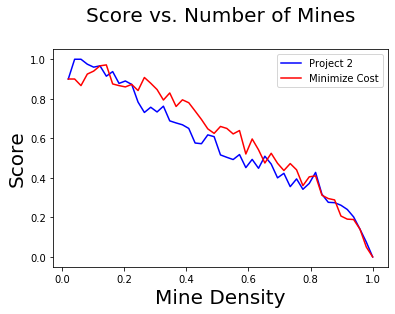

In [483]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


plt.xlabel('Mine Density',fontsize=20)
plt.ylabel('Score',fontsize=20)

plt.plot(nlist/49,score1,'b',linewidth=1.5,label = 'Project 2')
plt.plot(nlist/49,score2,'r',linewidth=1.5,label = 'Minimize Cost')


plt.legend(loc='upper right')
plt.title("Score vs. Number of Mines\n", fontsize = 20)
plt.show()

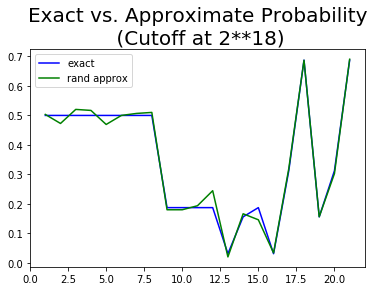

[-0.00340136  0.02721088 -0.02040816 -0.0170068   0.03061224  0.
 -0.00680272 -0.01020408  0.00722789  0.00722789 -0.00637755 -0.05739796
  0.01084184 -0.01041667  0.0412415  -0.00276361 -0.00722789  0.00042517
 -0.00021259  0.00977891 -0.00297619]


In [487]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

nlist = np.linspace(1, len(prob1), len(prob1))

plt.plot(nlist,prob1,'b',linewidth=1.5,label = 'exact')
plt.plot(nlist,prob3,'g',linewidth=1.5,label = 'rand approx')


plt.legend(loc='upper left')
plt.title("Exact vs. Approximate Probability\n (Cutoff at 2**18)", fontsize = 20)
plt.show()

print(np.array(prob1)-np.array(prob3))

In [547]:
#check unopened neighbors of given coord for given agent board
#return the number of squares that can be definitely determined
def solveForSquareHelper(q, agent_board, coord, dim, isSafe):
    #copy agent_board into sample board
    sample = np.zeros((dim,dim))
    for i in range(0, dim):
        for j in range(0, dim):
            sample[i][j] = agent_board[i][j]
            
    #sample = np.copy(agent_board)
    
    #print("Agent's board at beginning:")
    #print(sample)
    
    #a list of the expected squares that can definitely be worked out in sample board
    definiteSquares = []
    
    #mark square as either temp mine (.5) or temp safe (10)
    if(isSafe == 0):
        sample[coord[0]][coord[1]] = .5
    else:
        sample[coord[0]][coord[1]] = 10
    
    #populate a list of all the possible moves we can make
    #populate knowledge base with known squares
    possible_moves = []
    KB = []
    for i in range(0, dim):
        for j in range(0, dim):
            if(sample[i][j] == 11):
                possible_moves.append((i, j))
                
    for i in range(0, dim):
        for j in range(0, dim):
            if(sample[i][j] != .5 and sample[i][j] != 9 and sample[i][j] != 11 and sample[i][j] != 10):
                KB.append([(i,j), sample[i][j], len(checkNeighbors(possible_moves, (i,j))), sample[i][j]])
        
    #populate a list of the neighbors of the coord
    possible_neighbors = checkNeighbors(possible_moves,coord)

    #print("Agent's board:")
    #print(sample)
        
    #go through KB to find definite moves to count
    for item in KB:
        
        for item2 in range(0, len(KB)):
            #Update the temporary clue
            if KB[item2][1] + checkMines(sample, KB[item2][0]) == KB[item2][3]:
                pass
            else:
                KB[item2][1] = KB[item2][3] - checkMines(sample, KB[item2][0])
        
        #if clue is 0 all neighbors are safe
        if item[1] == 0:
            definiteSquares += checkNeighbors(possible_moves, item[0])
            
        #if number of neighbors is equal to tempClue, all are mines
        elif item[1] == item[2]:
            definiteSquares += checkNeighbors(possible_moves, item[0])

    #remove duplicates in the list of definite coords identifiable and count number of remaining coords
    definiteSquares = list(dict.fromkeys(definiteSquares))
    numSquaresWorkedOut = len(definiteSquares)    
  
    return numSquaresWorkedOut

In [570]:
def expectedSquares(q, coord, agent_board):
    dim = len(agent_board)
    
    # mine = 0, safe = 1
    #print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SET AS MINE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    squaresWorkedOut_m = solveForSquareHelper(q, agent_board, coord, dim, 0)
    #print("Num squares worked out M: ", squaresWorkedOut_m)
    #print("MINE VAL: ", q*squaresWorkedOut_m)
    #print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SET AS SAFE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    squaresWorkedOut_s = solveForSquareHelper(q, agent_board, coord, dim, 1)
    #print("Num squares worked out S: ", squaresWorkedOut_s)
    #print("SAFE VAL: ", (1-q)*squaresWorkedOut_s)
    numSquares = q*squaresWorkedOut_m + (1-q)*squaresWorkedOut_s
    #print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ RETURNED VALUE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    return numSquares

In [571]:
'''
agent_board = [[2,11,1],[11,11,11],[11,3,11]]
q = .5
coord = (0,1)
'''
agent_board = [[11,11,11,11,11],[11,1,11,1,11],[11,11,11,11,11],[11,11,3,11,11],[11,11,11,11,11]]
q = .5
coord = (1,2)

print ("The expected number of squares that could be worked out is", expectedSquares(q, coord, agent_board))

The expected number of squares that could be worked out is 6.0


In [565]:
'''
The Actual Game to be Played by our Agent

***********************INFERENCE****************************

**inputs:
dim = dimension size of the grid
n = number of mines

**returns:

'''

def AdvancedMinesweeperRisk(dim, n):

    #create our main board and the board the agent will see
    main_board = environment(dim, n)
    agent_board = environment(dim, 0) + 11

    #our three fringes, which make up our general knowledge base
    mineFringe = []
    safeFringe = []
    KB = []

    #a list of the moves made in order to be used in pygame
    moveOrder = []

    #convert equation number to coordinate for inference
    dic1 = {}
    t = 0
    for i in range(dim):
        for j in range(dim):
            dic1[t] = (i,j)
            t += 1

    #convert coordinate to equation number for inference
    dic2 = {}
    t = 0
    for i in range(dim):
        for j in range(dim):
            dic2[(i,j)] = t
            t += 1

    #populate a list of all the possible moves we can make, which will keep track of moves that can be made
    possible_moves = []
    for i in range(0, dim):
        for j in range(0, dim):
            possible_moves.append((i, j))


    #play until we finish the game
    gameFinished = False
    while gameFinished == False:

        #our terminating condition
        if len(possible_moves)==0:
            gameFinished=True

            clear_output()


            #UNCOMMENT TO SHOW BOARD OUTPUTS
            '''
            print("Agent's Board:")
            print(agent_board)
            print("The Actual Board:")
            print(main_board)
            '''

            #check our final score (# of correctly identified mines/# of total mines)
            total, correct = 0, 0
            for i in range(0, dim):
                for j in range(0, dim):
                    if main_board[i][j] == 9:
                        total += 1
                    if agent_board[i][j] == 0.5:
                        correct += 1
                        
            score = correct/total
            #print(score)
            return score

        else:

            '''
            #CHECK THE MINE FRINGE
            '''

            #if nothing in the mine fringe pass to next step
            if len(mineFringe) == 0:
                pass

            #immediately flag things in mine fringe
            else:

                #go through the mineFringe and flag spots until the fringe is empty again
                while len(mineFringe) != 0:

                    #if the move has already been made, remove from minefringe
                    if not(mineFringe[0] in possible_moves):
                        mineFringe.remove(mineFringe[0])
                        continue

                    #flag a spot with 0.5
                    agent_board[mineFringe[0][0]][mineFringe[0][1]] = 0.5

                    #remove from possible moves and mine fringe
                    possible_moves.remove(mineFringe[0])
                    moveOrder.append((mineFringe[0], 0.5))
                    mineFringe.remove(mineFringe[0])

                #restarts main while loop from beginning
                continue

            '''
            #CHECK THE SAFE FRINGE
            '''

            #if nothing in the safe fringe pass to next step
            if len(safeFringe) == 0:
                pass

            #immediately open things in safe fringe
            else:

                #go through the safeFringe and open spots until the fringe is empty again
                while len(safeFringe) != 0:

                    #if the move has already been made
                    if not(safeFringe[0] in possible_moves):
                        safeFringe.remove(safeFringe[0])
                        continue

                    i = safeFringe[0][0]
                    j = safeFringe[0][1]

                    #open a spot if it is in the safe fringe
                    agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)

                    #add move to KB, then remove from possible moves and mine fringe
                    KB.append([coord, clue, len(checkNeighbors(possible_moves, coord)), clue])
                    possible_moves.remove(safeFringe[0])
                    moveOrder.append((safeFringe[0], clue))
                    safeFringe.remove(safeFringe[0])

                #restarts main while loop from beginning
                continue

            '''
            #CHECK THE KNOWLEDGE BASE
            '''
            #the knowledge base if of the form [(i,j), tempClue, numNeighbors, clue]

            #if nothing in the KB pass to next step
            if len(KB) == 0:
                pass

            #look through our KB for moves to add to safe fringe or mine fringe
            else:
                #make a list for things to be removed from KB
                to_be_removed = []
                for item in range(0, len(KB)):

                    #updates the value of adjacent neighbors in the KB
                    KB[item][2] = len(checkNeighbors(possible_moves, KB[item][0]))

                    #Update the temporary clue
                    if KB[item][1] + checkMines(agent_board, KB[item][0]) == KB[item][3]:
                        pass
                    else:
                        KB[item][1] = KB[item][3] - checkMines(agent_board, KB[item][0])


                check = False
                #check each item in the KB
                for item in KB:
                    #if clue is 0 all neighbors are safe
                    if item[1] == 0:
                        x = item
                        safeFringe += checkNeighbors(possible_moves, x[0])
                        check = True
                        break


                    #if number of neighbors is equal to tempClue, all are mines
                    elif item[1] == item[2]:
                        x = item
                        mineFringe += checkNeighbors(possible_moves, x[0])
                        check = True
                        break

                    #if neither of the two above things, don't do anything
                    else:
                        pass


                #only remove from KB if we added something to mine or safe fringe
                if check == True:
                    KB.remove(x)
                    continue

            '''
            #INFERENCE
            '''

            #take from knowledge base and add to an equation
            inference = []
            equals = []
            for item in KB:
                eq = equation(dim)
                x = checkNeighbors(possible_moves, item[0])
                for thing in x:
                    eq[dic2[thing]] = 1

                #append each equation to a general matrix
                inference.append(eq)
                #append the clue to a general matrix
                equals.append([item[1]])

            #the matrix solver
            if len(inference) == 0:
                pass
            else:
                #a list to make things easier in a later step
                index=list(range(len(inference)))
                #check through column
                for i in range(len(inference[0])):
                    #check through row
                    for row in range(len(inference)):
                        #this is for checking zero rows and columns
                        #looking for the first nonzero item in the row that has no nonzero to its left
                        if inference[row][i]!=0 and 1 not in inference[row][0:i]:

                            #scale the whole row by the leading nonzero item selected
                            scalar=1/inference[row][i]
                            for column in range(0,len(inference[0])):
                                inference[row][column]*=scalar
                            equals[row][0]*=scalar

                            #now do operations on every row but the one selected
                            for k in index[0:row]+index[row+1:]:

                                scalar2=inference[k][i]
                                for j in range(len(inference[0])):
                                    inference[k][j]=inference[k][j]-scalar2*inference[row][j]
                                equals[k][0]=equals[k][0]-scalar2*equals[row][0]

                gobackup=False

                #now perform a check on our matricies
                for i in range(len(inference)):

                    #counters to be used to check if an inference can be made
                    counter=0
                    negCounter=0

                    #check how many ones are in a row
                    for j in range(len(inference[i])):
                        if inference[i][j]==1:
                            counter+=1

                        #check for negative variables in the equation
                        elif inference[i][j] < 0:
                            negCounter+=1

                    #check if we have a definite safe move
                    if equals[i][0]==0 and counter > 0 and negCounter==0:
                        gobackup=True
                        for j in range(len(inference[i])):
                            if inference[i][j]==1:
                                safeFringe.append(dic1[j])

                    #check if we have a definite mine to flag
                    if counter == equals[i][0] and counter > 0 and negCounter==0:
                        gobackup=True
                        for j in range(len(inference[i])):
                            if inference[i][j]==1:
                                mineFringe.append(dic1[j])
                    
                    #A - B = 1
                    if counter == equals[i][0] and negCounter > 0:
                        gobackup=True
                        for j in range(len(inference[i])):
                            if inference[i][j]==1:
                                mineFringe.append(dic1[j])
                            elif inference[i][j]==-1:
                                safeFringe.append(dic1[j])

                    #A - B = -1
                    if -1*negCounter == equals[i][0] and counter > 0:
                        gobackup=True
                        for j in range(len(inference[i])):
                            if inference[i][j]==1:
                                safeFringe.append(dic1[j])
                            elif inference[i][j]==-1:
                                mineFringe.append(dic1[j])

                #if we made an inference, go back up
                if gobackup==True:
                    continue

                    
            '''
            #PROBABILITY/MINIMIZE COST 
            '''   
            if len(inference)==0:
                pass
            else: 
                matrix = np.array(inference)
                equals = np.array(equals)
                equals = equals[:,0]
                
                a,b,c=reduce(matrix)
                prob = getProbs(generateSolutions(c), c, equals)
                
                #MINIMIZING RISK
                risk = []
                for i in range(0, len(prob)):
                    coord = dic1[b[i]]
                    q = prob[i]
                    risk.append(expectedSquares(q, coord, agent_board))
                    
                riskmax = -1
                for i in range(0,len(risk)):
                    if risk[i]>riskmax:
                        pointer=i
                        riskmax=risk[i]
            
                riskCoord=dic1[b[pointer]]
            
                agent_board, coord, clue = updateBoard((riskCoord[0], riskCoord[1]), main_board, agent_board)

                if clue == 9:
                    pass

                #otherwise add to KB
                else:
                    KB.append([coord, clue, len(checkNeighbors(possible_moves, coord)), clue])

                #remove from possible moves
                possible_moves.remove(coord)
                moveOrder.append((coord, clue))
                continue
            
                                        
            '''
            #RANDOMPICK (LAST RESORT)
            '''

            #pick a random coordinate from the remaining possible moves
            x = random.randint(0,len(possible_moves) - 1)
            i = possible_moves[x][0]
            j = possible_moves[x][1]

            #open the random spot
            agent_board, coord, clue = updateBoard((i,j), main_board, agent_board)

            #if the spot we hit was a mine tell the user and keep going, no need to add to KB
            if clue == 9:
                pass

            #otherwise add to KB
            else:
                KB.append([coord, clue, len(checkNeighbors(possible_moves, coord)), clue])

            #remove from possible moves
            possible_moves.remove(coord)
            moveOrder.append((coord, clue))

AdvancedMinesweeperRisk(10, 50)

0.68

In [554]:
nlist = np.linspace(1, 49, 49)

score1=[]
score2=[]
for item in nlist:
    temp1 = []
    temp2 = []
    while len(temp1) < 10:
        temp1.append(AdvancedMinesweeper(7,item))
        temp2.append(AdvancedMinesweeperRisk(7,item))
    print(item)
    time.sleep(0.5)
    score1.append(sum(temp1)/len(temp1))
    score2.append(sum(temp2)/len(temp2))
    

49.0


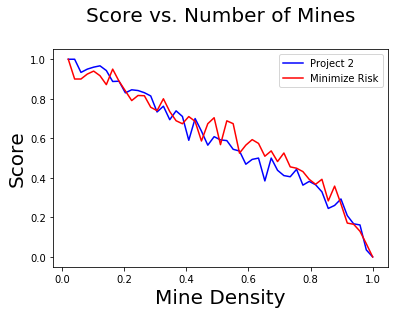

4.498242453541225


In [569]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


plt.xlabel('Mine Density',fontsize=20)
plt.ylabel('Score',fontsize=20)

plt.plot(nlist/49,score1,'b',linewidth=1.5,label = 'Project 2')
plt.plot(nlist/49,score2,'r',linewidth=1.5,label = 'Minimize Risk')


plt.legend(loc='upper right')
plt.title("Score vs. Number of Mines\n", fontsize = 20)
plt.show()

print(sum(np.array(score2[25:]) - np.array(score1[25:]))/len(np.array(score2[25:]) - np.array(score1[25:]))*100)

In [622]:
#check unopened neighbors of given coord for given agent board
#return the number of squares that can be definitely determined
def solveForSquareHelper(q, agent_board, coord, dim, isSafe):
    #copy agent_board into sample board
    sample = np.zeros((dim,dim))
    for i in range(0, dim):
        for j in range(0, dim):
            sample[i][j] = agent_board[i][j]
            
    #sample = np.copy(agent_board)
    
    print("Agent's board at beginning:")
    print(sample)
    
    #a list of the expected squares that can definitely be worked out in sample board
    definiteSquares = []
    
    #mark square as either temp mine (.5) or temp safe (10)
    if(isSafe == 0):
        sample[coord[0]][coord[1]] = .5
    else:
        sample[coord[0]][coord[1]] = 10
    
    #populate a list of all the possible moves we can make
    #populate knowledge base with known squares
    possible_moves = []
    KB = []
    for i in range(0, dim):
        for j in range(0, dim):
            if(sample[i][j] == 11):
                possible_moves.append((i, j))
                
    for i in range(0, dim):
        for j in range(0, dim):
            if(sample[i][j] != .5 and sample[i][j] != 9 and sample[i][j] != 11 and sample[i][j] != 10):
                KB.append([(i,j), sample[i][j], len(checkNeighbors(possible_moves, (i,j))), sample[i][j]])
        
    #populate a list of the neighbors of the coord
    possible_neighbors = checkNeighbors(possible_moves,coord)

    print("Agent's board:")
    print(sample)
        
    #go through KB to find definite moves to count
    i = 0
    while i < len(KB):
        updated = False
        for item2 in range(0, len(KB)):
            
            KB[item2][2] = len(checkNeighbors(possible_moves, KB[item2][0]))
            
            if KB[item2][1] + checkMines(sample, KB[item2][0]) == KB[item2][3]:
                pass
            else:
                KB[item2][1] = KB[item2][3] - checkMines(sample, KB[item2][0])
                updated = True
                
        print(KB)
        
        if KB[i][1] == 0:
            definiteSquares += checkNeighbors(possible_moves, KB[i][0])
            KB.remove(KB[i])
            for item in definiteSquares:
                sample[item[0]][item[1]] = 10
            i = 0
            continue
            
        elif KB[i][1] == KB[i][2]:
            definiteSquares += checkNeighbors(possible_moves, KB[i][0])
            KB.remove(KB[i])
            for item in definiteSquares:
                sample[item[0]][item[1]] = 10
            i = 0
            continue
                
                
        print("Agent's board:")
        print(sample)
                
        i += 1
                
        '''
        #if clue is 0 all neighbors are safe
        if item[1] == 0:
            definiteSquares += checkNeighbors(possible_moves, item[0])
            
        #if number of neighbors is equal to tempClue, all are mines
        elif item[1] == item[2]:
            definiteSquares += checkNeighbors(possible_moves, item[0])
        '''
    #remove duplicates in the list of definite coords identifiable and count number of remaining coords
    definiteSquares = list(dict.fromkeys(definiteSquares))
    numSquaresWorkedOut = len(definiteSquares)    
  
    return numSquaresWorkedOut

In [623]:
def expectedSquares(q, coord, agent_board):
    dim = len(agent_board)
    
    mine = 0
    safe = 1
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SET AS MINE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    squaresWorkedOut_m = solveForSquareHelper(q, agent_board, coord, dim, 0)
    print("Num squares worked out M: ", squaresWorkedOut_m)
    print("MINE VAL: ", q*squaresWorkedOut_m)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SET AS SAFE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    squaresWorkedOut_s = solveForSquareHelper(q, agent_board, coord, dim, 1)
    print("Num squares worked out S: ", squaresWorkedOut_s)
    print("SAFE VAL: ", (1-q)*squaresWorkedOut_s)
    numSquares = q*squaresWorkedOut_m + (1-q)*squaresWorkedOut_s
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ RETURNED VALUE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    return numSquares

In [624]:

agent_board = [[2,11,1],[11,11,11],[11,3,11]]
q = .5
coord = (0,1)
'''
agent_board = [[11,11,11,11,11],[11,1,11,1,11],[11,11,11,11,11],[11,11,3,11,11],[11,11,11,11,11]]
q = .5
coord = (1,2)
'''

print ("The expected number of squares that could be worked out is", expectedSquares(q, coord, agent_board))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SET AS MINE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Agent's board at beginning:
[[ 2. 11.  1.]
 [11. 11. 11.]
 [11.  3. 11.]]
Agent's board:
[[ 2.   0.5  1. ]
 [11.  11.  11. ]
 [11.   3.  11. ]]
[[(0, 0), 1.0, 2, 2.0], [(0, 2), 0.0, 2, 1.0], [(2, 1), 3.0, 5, 3.0]]
Agent's board:
[[ 2.   0.5  1. ]
 [11.  11.  11. ]
 [11.   3.  11. ]]
[[(0, 0), 1.0, 2, 2.0], [(0, 2), 0.0, 2, 1.0], [(2, 1), 3.0, 5, 3.0]]
[[(0, 0), 1.0, 2, 2.0], [(2, 1), 3.0, 5, 3.0]]
Agent's board:
[[ 2.   0.5  1. ]
 [11.  10.  10. ]
 [11.   3.  11. ]]
[[(0, 0), 1.0, 2, 2.0], [(2, 1), 3.0, 5, 3.0]]
Agent's board:
[[ 2.   0.5  1. ]
 [11.  10.  10. ]
 [11.   3.  11. ]]
Num squares worked out M:  2
MINE VAL:  1.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SET AS SAFE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Agent's board at beginning:
[[ 2. 11.  1.]
 [11. 11. 11.]
 [11.  3. 11.]]
Agent's board:
[[ 2. 10.  1.]
 [11. 11. 11.]
 [11.  3. 11.]]
[[(0, 0), 2.0, 2, 2.0], [(0, 2), 1.0, 2, 